# Take Home

In [191]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## read daily-female-birth data and convert it into tie series

In [168]:
df= pd.read_csv('daily-total-female-births.csv',parse_dates = ['Date'], index_col = 'Date',dayfirst=True)

In [169]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [170]:
df.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [171]:
df.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


## plot the time series

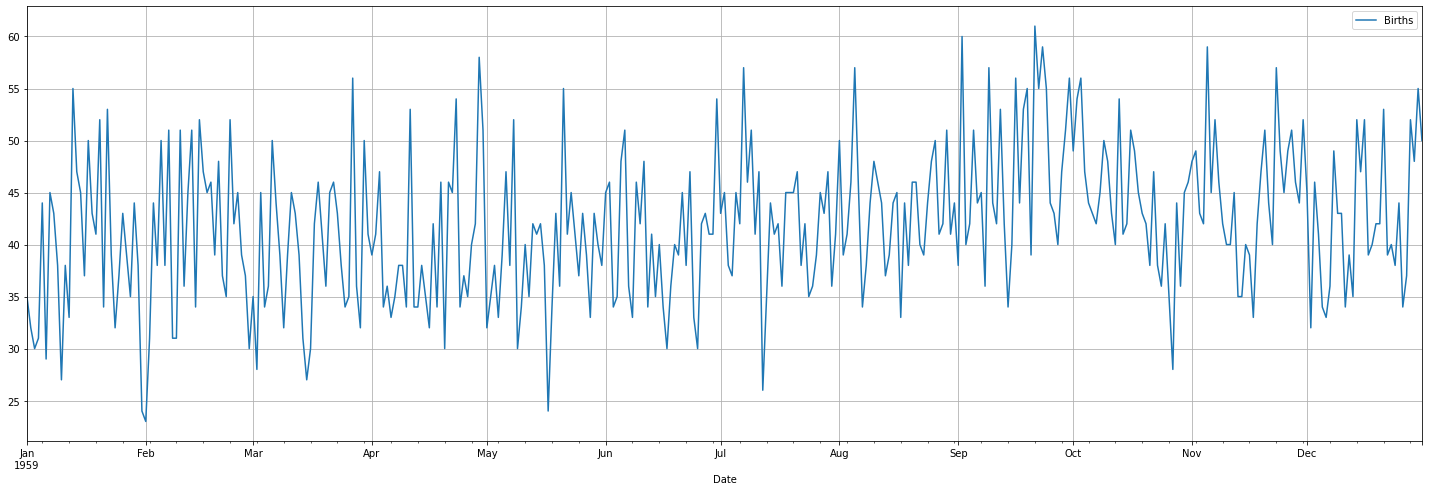

In [172]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

# Check the stationarity of series using ADF test

In [173]:
observations= df.values
test_result = adfuller(observations)

In [174]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -4.933242
p-value: 0.000030
Critical Values:
	1%: -3.44875
	5%: -2.86965
	10%: -2.57109


# using ACF and PACF plot find the values of p and q

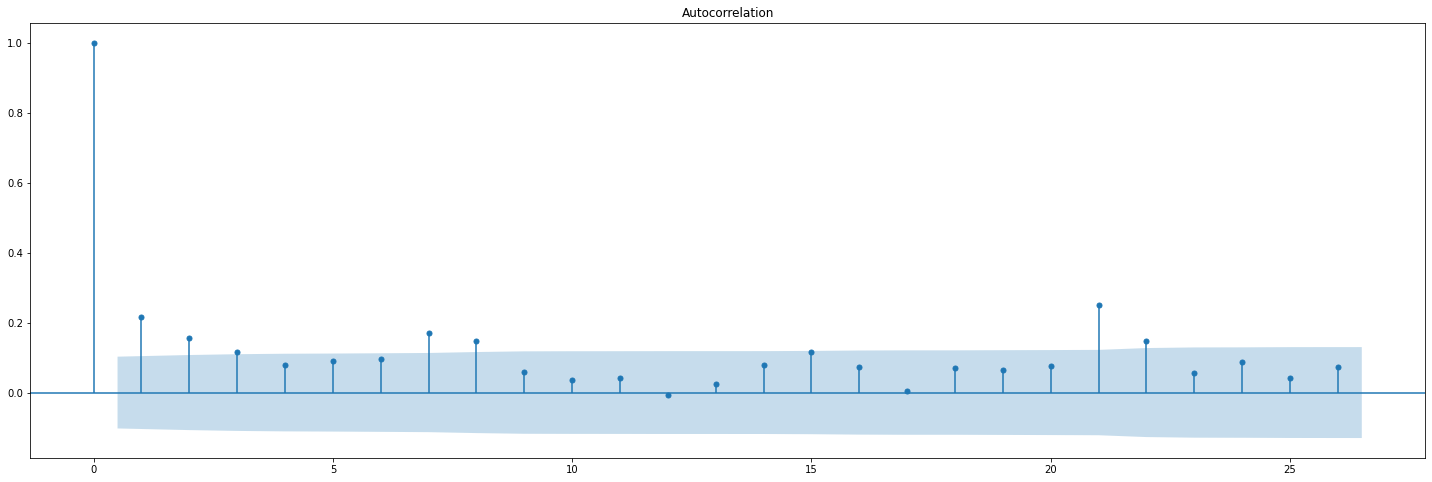

In [175]:
plot_acf(df);

## plotting PACF

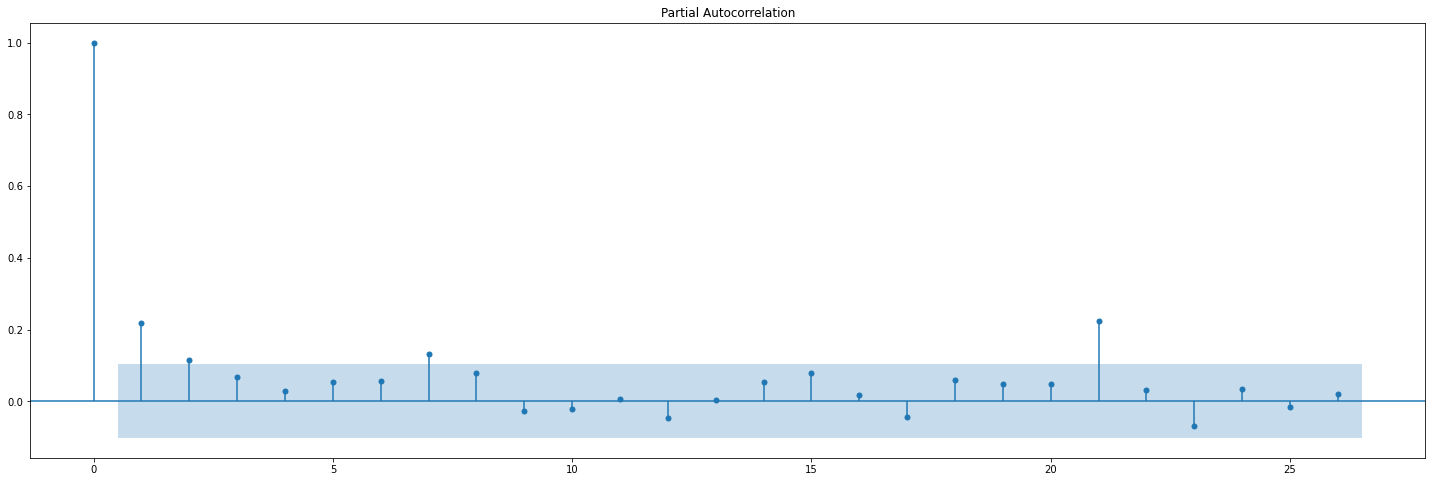

In [176]:
plot_pacf(df);

# Split the data into traininga and testing set

In [153]:
train_end=datetime(1959,11,15)
test_end=datetime(1959,12,31)

In [ ]:
train=df

In [154]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [155]:
train.shape

(319, 1)

In [156]:
test.shape

(46, 1)

# Build ARMA model for selected p and q

In [161]:
model=ARMA(train,(2,2))

In [162]:
model_fit=model.fit()

In [163]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 Births   No. Observations:                  319
Model:                     ARMA(2, 2)   Log Likelihood               -1062.133
Method:                       css-mle   S.D. of innovations              6.735
Date:                Fri, 26 Feb 2021   AIC                           2136.266
Time:                        18:06:48   BIC                           2158.857
Sample:                    01-01-1959   HQIC                          2145.288
                         - 11-15-1959                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3803      1.333     31.055      0.000      38.769      43.992
ar.L1.Births     0.0039      0.032      0.122      0.903      -0.058       0.066
ar.L2.Births     0.9506      0.029     32.45

# Find predictions of model for the range of test data

In [164]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [165]:
predictions=model_fit.predict(start=pred_start, end=pred_end)

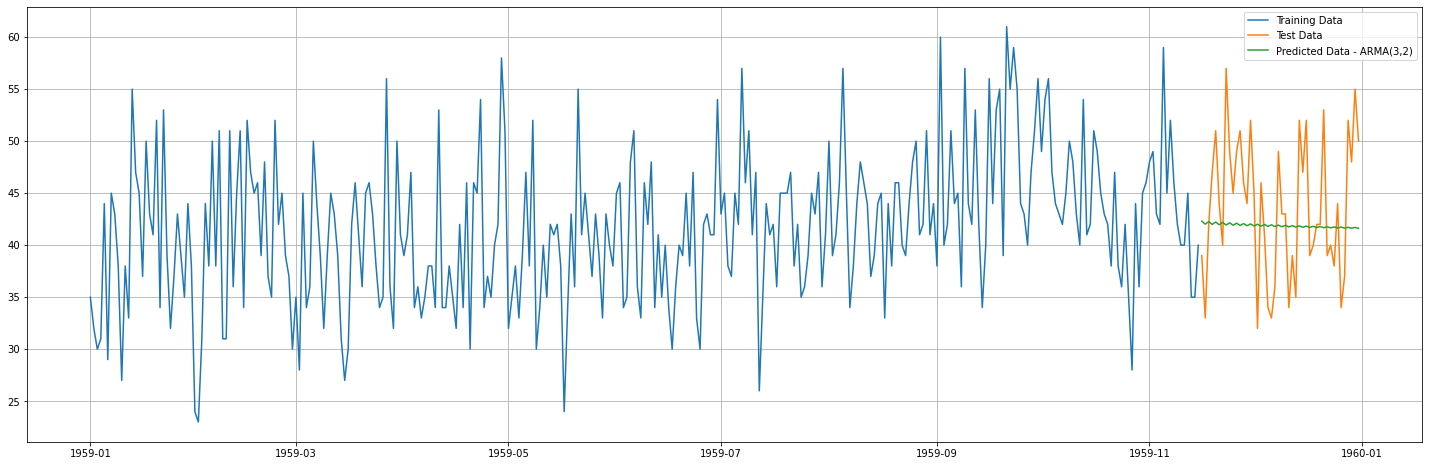

In [166]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(3,2)')
plt.legend(loc='best')
plt.grid();

# Find residuals for the model and plot using Q-Q- plot

In [136]:
residuals = test.Births - predictions

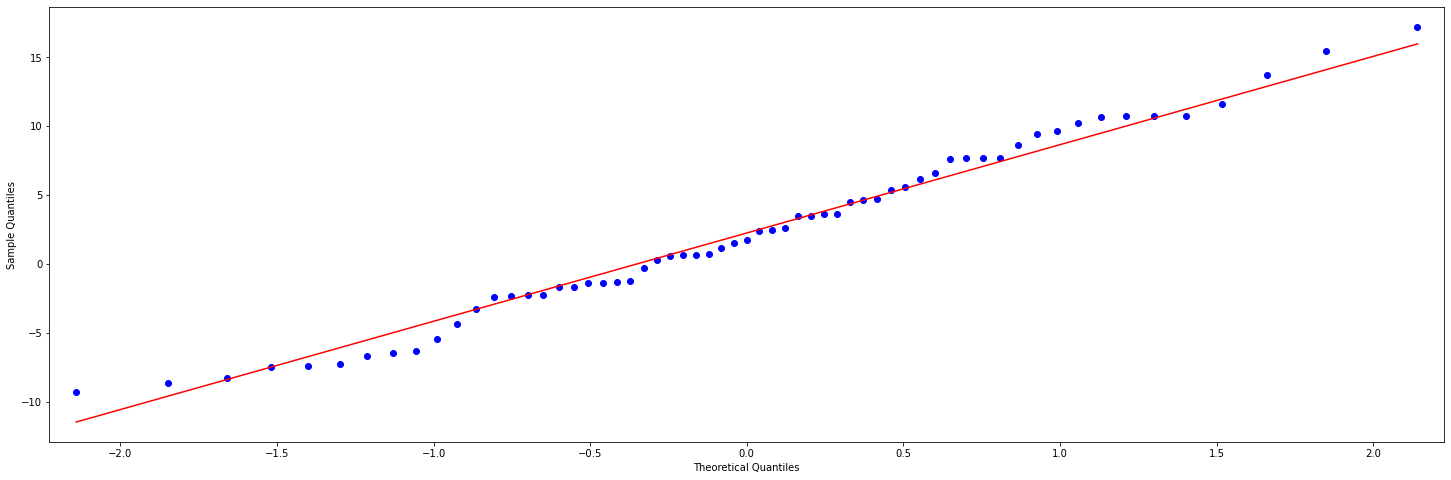

In [137]:
qqplot(residuals,line="s");

In [204]:
ci=model_fit.forecast(steps=10,alpha=0.1)
ci

(array([42.30966824, 42.01958702, 42.26620042, 41.99141044, 42.22477231,
        41.96446653, 42.18528784, 41.93870187, 42.1476555 , 41.91406533]),
 array([6.7350602 , 6.76317297, 6.76815647, 6.79352663, 6.79809238,
        6.82099873, 6.82518301, 6.84587395, 6.84970964, 6.86840687]),
 array([[31.23148003, 53.38785644],
        [30.89515743, 53.14401661],
        [31.1335737 , 53.39882715],
        [30.81705352, 53.16576736],
        [31.04290541, 53.40663921],
        [30.74492203, 53.18401103],
        [30.95886081, 53.41171487],
        [30.67824127, 53.19916248],
        [30.88088575, 53.41442524],
        [30.61654138, 53.21158929]]))